In [2]:
from yahoo_finance_api import YahooFinance as yf

In [20]:
import matplotlib.pyplot as plt

In [44]:
ticker='TSLA'
data = yf(ticker, result_range='2y', interval='1d').result

In [48]:
import ta   # technical analysis library

data['sma_20'] = ta.trend.sma_indicator(data['Close'], window=20)
data['sma_50'] = ta.trend.sma_indicator(data['Close'], window=50)
data['sma_22'] = ta.trend.sma_indicator(data['Close'], window=22)
data['sma_52'] = ta.trend.sma_indicator(data['Close'], window=52)
data['sma_24'] = ta.trend.sma_indicator(data['Close'], window=24)
data['sma_54'] = ta.trend.sma_indicator(data['Close'], window=54)

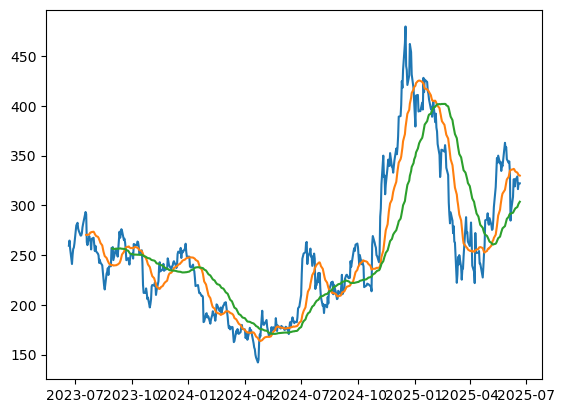

In [34]:
plt.plot(data.index, data[["Close","sma_20","sma_50"]])

,Open,High,Low,Close,Volume,sma_20,sma_50,sma_22,sma_52,sma_24,sma_54
2023-06-21 09:30:00,275.13,276.99,257.78,259.46,211797100,NaN,NaN,NaN,NaN,NaN,NaN
2023-06-22 09:30:00,250.77,265.00,248.25,264.61,166875900,NaN,NaN,NaN,NaN,NaN,NaN
2023-06-23 09:30:00,259.29,262.45,252.80,256.60,176584100,NaN,NaN,NaN,NaN,NaN,NaN
2023-06-26 09:30:00,250.07,258.37,240.70,241.05,179990600,NaN,NaN,NaN,NaN,NaN,NaN
2023-06-27 09:30:00,243.24,250.39,240.85,250.21,164968200,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2025-06-13 09:30:00,313.97,332.99,313.30,325.31,128964300,333.9970,297.0884,335.020000,296.262308,334.287083,294.969444
2025-06-16 09:30:00,331.29,332.05,326.41,329.13,83925900,332.9545,298.3254,334.176818,297.429038,334.735000,296.183889
2025-06-17 09:30:00,326.09,327.26,314.74,316.35,88282700,331.6675,299.8638,332.973636,298.075000,333.996667,297.242963
2025-06-18 09:30:00,317.31,329.32,315.45,322.05,95137700,330.5790,301.6390,331.704091,299.128269,332.928750,298.235370


In [50]:
# Calculate MACD and signal line using `ta`
data['MACD'] = ta.trend.macd(data['Close'])
data['MACD_signal'] = ta.trend.macd_signal(data['Close'])
data['MACD_diff'] = ta.trend.macd_diff(data['Close'])

AttributeError: 'str' object has no attribute 'items'

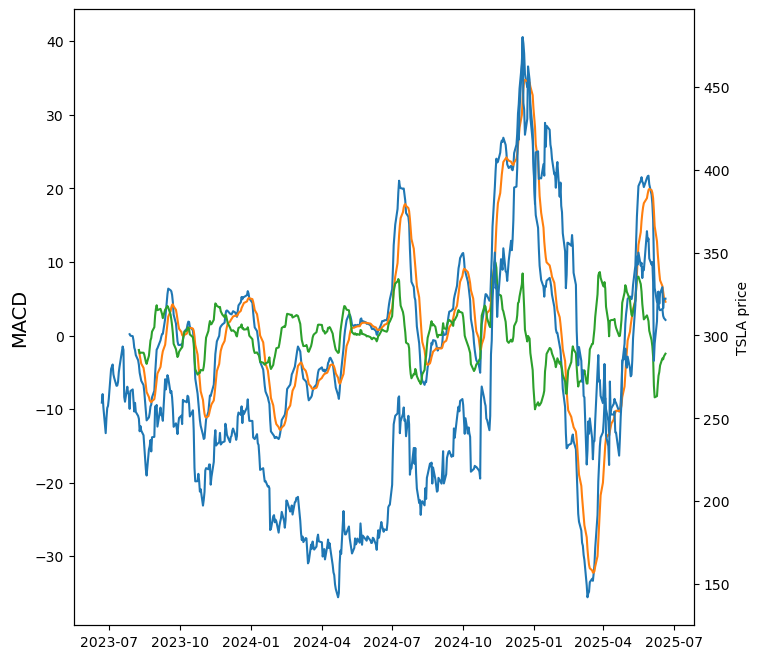

In [56]:
fig, ax1 = plt.subplots(figsize=(8, 8))
ax2 = ax1.twinx()

ax1.plot(data.index, data[["MACD",'MACD_signal','MACD_diff']])
ax2.plot(data.index, data[["Close"]])

ax1.set_ylabel("MACD",  fontsize=14)
ax2.set_ylabel(f"{ticker} price", '--', fontsize=14)
plt.legend()

<Axes: >

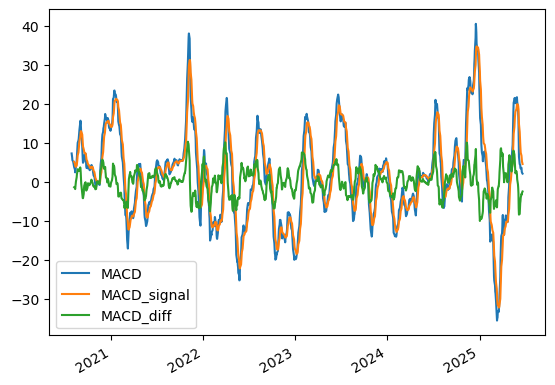

In [22]:
data.plot(y=['MACD','MACD_signal','MACD_diff'])

In [8]:
data['signal'] = (data['sma_20'] > data['sma_50']).astype(int)

In [12]:
data

,Open,High,Low,Close,Volume,sma_20,sma_50,signal
2024-06-20 09:30:00,213.93,214.24,208.85,209.68,86172500,NaN,NaN,0
2024-06-21 09:30:00,210.39,211.89,207.11,207.49,246421400,NaN,NaN,0
2024-06-24 09:30:00,207.72,212.70,206.59,208.14,80727000,NaN,NaN,0
2024-06-25 09:30:00,209.15,211.38,208.61,209.07,56713900,NaN,NaN,0
2024-06-26 09:30:00,211.50,214.86,210.64,213.25,66213200,NaN,NaN,0
...,...,...,...,...,...,...,...,...
2025-06-12 09:30:00,199.08,199.68,197.36,199.20,43904600,202.647,201.9800,1
2025-06-13 09:30:00,199.73,200.37,195.70,196.45,51447300,201.897,201.4312,1
2025-06-16 09:30:00,197.30,198.69,196.56,198.42,43020700,201.255,201.3358,0
2025-06-17 09:30:00,197.20,198.39,195.21,195.64,38856200,200.598,201.4810,0


<Axes: >

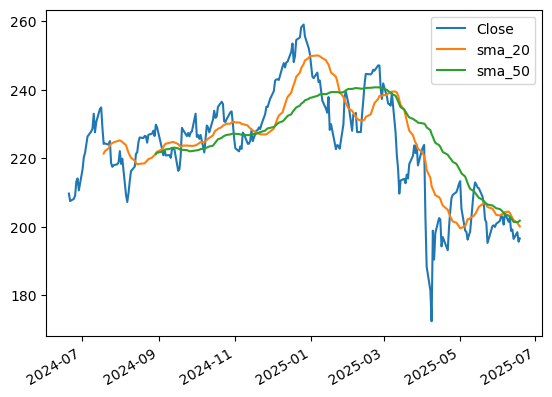

<Axes: >

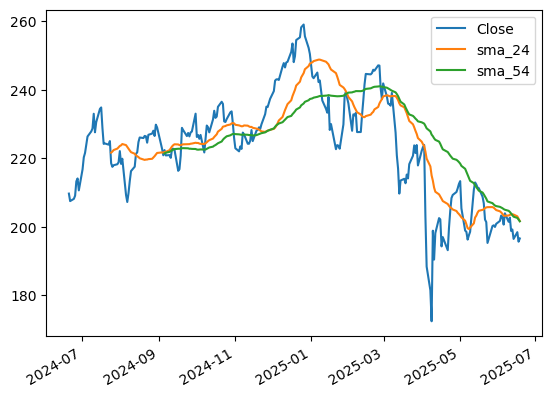

In [9]:
tata_power = yf('TATAPOWER.NS', result_range='1mo', interval='15m', dropna='True').result

In [11]:
len(tata_power)

576

In [13]:
tata_power

,Open,High,Low,Close,Volume
2025-06-19 23:21:19,408.45,408.55,404.65,404.75,429054
2025-06-19 23:21:19,404.65,407.40,403.15,405.95,515882
2025-06-19 23:21:19,405.95,407.35,404.15,406.45,371988
2025-06-19 23:21:19,406.45,407.65,405.25,405.50,385546
2025-06-19 23:21:19,405.45,406.05,404.80,405.20,315910
...,...,...,...,...,...
2025-06-19 23:21:19,386.45,386.95,385.70,386.15,137742
2025-06-19 23:21:19,386.15,386.35,385.50,385.90,87040
2025-06-19 23:21:19,385.80,385.80,384.85,384.95,324751
2025-06-19 23:21:19,384.95,384.95,383.40,383.65,425475


In [118]:
timestamps = data['chart']['result'][0]['timestamp']

In [120]:
       timestamps = [_time.strftime('%a, %d %b %Y %H:%M:%S') for x in timestamps]

In [122]:
timestamps[0]

'Thu, 19 Jun 2025 23:12:50'

In [111]:
timestamps[0]

1750253400

In [32]:
apple_daily = YahooFinance('AAPL', result_range='1mo', interval='1d').result

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [28]:
ticker = yf.Ticker("AAPL")
data = ticker.history(period="1d")
print(data)

AttributeError: type object 'YahooFinance' has no attribute 'Ticker'

In [24]:
tata_power = YahooFinance('TATAPOWER.NS', result_range='1mo', interval='15m', dropna='True').result

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [18]:
tata_power = YahooFinance('TATAPOWER.NS', result_range='1mo', interval='15m', dropna='True').result

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [16]:
apple_daily = YahooFinance('AAPL', result_range='1mo', interval='1d').result

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [34]:
print(response.status_code)

NameError: name 'response' is not defined

In [24]:
import requests
import json

result_range='1mo',
interval='15m',
params = {'range': result_range, 'interval': interval}

headers = {
    "User-Agent": "Mozilla/5.0"
}
url = "https://query1.finance.yahoo.com/v8/finance/chart/AAPL"
response = requests.get(url, headers=headers)
data = response.json()


In [26]:
import requests
import json
ticker='TSLA'
url = "https://query1.finance.yahoo.com/v8/finance/chart/{}".format(ticker)

result_range='1mo',
interval='15m',
params = {'range': result_range, 'interval': interval}
r = requests.get(url=url, params=params, headers=headers)
data = r.json()

In [70]:
timestamps = data['chart']['result'][0]['timestamp']

In [53]:
timestamps = [_time.strftime('%a, %d %b %Y %H:%M:%S', _time.localtime(x)) for x in timestamps]

In [65]:
timestamps[0]

'Wed, 18 Jun 2025 09:30:00'

In [37]:
from datetime import datetime
import time  as _time
now = datetime.now()
formatted = now.strftime('%a, %d %b %Y %H:%M:%S')
custom = formatted.replace("Tuesday", "Tues")

In [36]:
alueError: time data "Mon, 02 Jun 2025 09:30:00" doesn't match format "%a, %d %B %Y %H:%M:%S", at position 9. You might want t

'Thu, 19 Jun 2025 22:25:36'

In [39]:
        timestamps = data['chart']['result'][0]['timestamp']
        timestamps = [_time.strftime('%a, %d %b %Y %H:%M:%S', _time.localtime(x)) for x in timestamps]
        volumes = data['chart']['result'][0]['indicators']['quote'][0]['volume']
        opens = data['chart']['result'][0]['indicators']['quote'][0]['open']
        # opens = _round_of_list(opens)
        closes = data['chart']['result'][0]['indicators']['quote'][0]['close']
        # closes = _round_of_list(closes)
        lows = data['chart']['result'][0]['indicators']['quote'][0]['low']
        # lows = _round_of_list(lows)
        highs = data['chart']['result'][0]['indicators']['quote'][0]['high']
        # highs = _round_of_list(highs)
        df_dict = {'Open': opens, 'High': highs, 'Low': lows, 'Close': closes, 'Volume': volumes}

In [51]:
timestamps[0]

'Mon, 19 May 2025 09:30:00'

In [53]:
df.head()

,Open,High,Low,Close,Volume
"Mon, 19 May 2025 09:30:00",338.000000,338.739899,333.380005,337.100006,16004896
"Mon, 19 May 2025 09:45:00",337.140015,338.690002,335.440002,338.319305,5150189
"Mon, 19 May 2025 10:00:00",338.292297,341.480011,337.750000,340.276886,5847756
"Mon, 19 May 2025 10:15:00",340.269989,343.000000,338.989990,339.902802,5187684
"Mon, 19 May 2025 10:30:00",339.880798,340.638214,338.980011,339.072510,2966885


In [61]:
df.head()

,Open,High,Low,Close,Volume
2025-05-19 09:30:00,338.000000,338.739899,333.380005,337.100006,16004896
2025-05-19 09:45:00,337.140015,338.690002,335.440002,338.319305,5150189
2025-05-19 10:00:00,338.292297,341.480011,337.750000,340.276886,5847756
2025-05-19 10:15:00,340.269989,343.000000,338.989990,339.902802,5187684
2025-05-19 10:30:00,339.880798,340.638214,338.980011,339.072510,2966885


In [59]:
df.index = pd.to_datetime(df.index, format='mixed')

In [45]:
df = pd.DataFrame(df_dict, index=timestamps)

In [63]:
df.index = pd.to_datetime(df.index)

In [65]:
df

,Open,High,Low,Close,Volume
2025-05-19 09:30:00,338.000000,338.739899,333.380005,337.100006,16004896
2025-05-19 09:45:00,337.140015,338.690002,335.440002,338.319305,5150189
2025-05-19 10:00:00,338.292297,341.480011,337.750000,340.276886,5847756
2025-05-19 10:15:00,340.269989,343.000000,338.989990,339.902802,5187684
2025-05-19 10:30:00,339.880798,340.638214,338.980011,339.072510,2966885
...,...,...,...,...,...
2025-06-18 15:00:00,321.160004,323.189911,320.089996,322.839996,3404767
2025-06-18 15:15:00,322.750000,323.950012,322.212799,322.217102,2589384
2025-06-18 15:30:00,322.209991,324.260010,321.910004,324.189789,2650831
2025-06-18 15:45:00,324.130005,324.339996,321.750000,322.095001,3888072


In [94]:
df

,Open,High,Low,Close,Volume
"Wed, 18 Jun 2025 09:30:00",195.919998,196.055603,195.089996,195.919998,1695026.0
"Wed, 18 Jun 2025 09:31:00",195.860001,196.139999,195.339996,195.404999,172154.0
"Wed, 18 Jun 2025 09:32:00",195.399994,195.563202,195.070007,195.440002,162379.0
"Wed, 18 Jun 2025 09:33:00",195.399994,195.496201,195.179993,195.220001,138462.0
"Wed, 18 Jun 2025 09:34:00",195.235001,195.359894,195.179993,195.229996,151963.0
...,...,...,...,...,...
"Wed, 18 Jun 2025 15:56:00",196.679993,196.860001,196.630005,196.815002,385655.0
"Wed, 18 Jun 2025 15:57:00",196.809998,196.860001,196.559998,196.675003,460666.0
"Wed, 18 Jun 2025 15:58:00",196.675003,196.740005,196.630005,196.669998,525304.0
"Wed, 18 Jun 2025 15:59:00",196.679993,196.750000,196.250000,196.250000,2075288.0


In [85]:
df_dict

{'Open': [195.9199981689453,
  195.86000061035156,
  195.39999389648438,
  195.39999389648438,
  195.23500061035156,
  195.2050018310547,
  195.3800048828125,
  195.3336944580078,
  195.60000610351562,
  195.5449981689453,
  195.52090454101562,
  195.5399932861328,
  195.64500427246094,
  195.43499755859375,
  195.47000122070312,
  195.47000122070312,
  195.40980529785156,
  195.44500732421875,
  195.39999389648438,
  195.80499267578125,
  196.10000610351562,
  None,
  196.34959411621094,
  196.38999938964844,
  196.28640747070312,
  196.16000366210938,
  196.1649932861328,
  196.33619689941406,
  196.30999755859375,
  196.33999633789062,
  196.38999938964844,
  196.27999877929688,
  196.3699951171875,
  196.4199981689453,
  196.5303955078125,
  196.61000061035156,
  196.77000427246094,
  196.8800048828125,
  196.90960693359375,
  196.77000427246094,
  196.85000610351562,
  196.83009338378906,
  196.93150329589844,
  197.2052001953125,
  197.0800018310547,
  197.07000732421875,
  197.0

In [75]:
    def _round_of_list(self, xlist):
        temp_list = []
        for x in xlist:
            if isinstance(x, float):
                temp_list.append(round(x, 2))
            else:
                temp_list.append(pd.np.nan)
        return temp_list